In [1]:
# Add project directory
import sys
sys.path.insert(0, '..')

import os
import pandas as pd
import aerosonicdb.data

In [2]:
dataset_path = '../data/raw'
audio_path = os.path.join(dataset_path, 'audio')

In [3]:
def get_audio_paths(df, dataset_path):
    sep = os.sep

    audio_dir = dataset_path + sep + 'audio' + sep
    paths = audio_dir + df['class'].astype(str) + sep + df['filename']
    return paths

In [4]:
def check_dir_setup():
    # check dataset directory exists
    if not os.path.exists(dataset_path):
        print('dataset directory not found - download the dataset to continue')
        
    if not os.path.exists(audio_path):
        print('audio directory not found')
        
    if not os.path.exists(os.path.join(audio_path, '0')):
                if not os.path.exists(os.path.join(audio_path, '1')):
                    print('Sub-directories not found')
    
    else:
        print('Directory ready') 

In [5]:
check_dir_setup()

Directory ready


In [6]:
aerosonicdb.data.download(target_directory=dataset_path)

Dataset already downloaded - see the "./data/raw" directory.


In [7]:
check_dir_setup()

Directory ready


In [8]:
# read in the "sample_meta.csv"
df = pd.read_csv(os.path.join(dataset_path, 'sample_meta.csv'))

In [38]:
df.head()

,train-test,fold,filename,date,time,duration,location_id,microphone_id,hex_id,altitude,...,typedesig,manu,model,engmanu,engmodel,engfamily,fueltype,propmanu,propmodel,mtow
0,train,0,7C7BD9_2022-12-08_12-01-35_0_0.wav,2022-12-08,12-01-35,20,0,0,7C7BD9,3125,...,DA42,DIAMOND AIRCRAFT INDUSTRIES,DA 42,TEXTRON LYCOMING,IO-360-M1A,IO-360,Gasoline,MT PROPELLERS,MTV-12-B-C-F/CF-183,1785
1,train,0,7C1CA2_2022-12-08_11-02-36_0_0.wav,2022-12-08,11-02-36,20,0,0,7C1CA2,3475,...,PC12,PILATUS AIRCRAFT LTD,PC-12/47E,PRATT & WHITNEY CANADA,PT6A-67P,PT6,Kerosene,HARTZELL PROPELLERS,HC-E5A-3A/NC10245B,4740
2,train,0,7C7AB4_2022-12-08_17-06-42_0_0.wav,2022-12-08,17-06-42,20,0,0,7C7AB4,3325,...,B738,THE BOEING COMPANY,737-8FE,"CFM INTERNATIONAL, S.A.",CFM-56-7B26/E,CFM56,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,79015
3,train,0,7C779A_2022-12-08_09-11-44_0_0.wav,2022-12-08,09-11-44,20,0,0,7C779A,3250,...,F100,FOKKER AIRCRAFT B.V.,F28 MK 0100,ROLLS ROYCE LTD,TAY 650-15,TAY,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,44450
4,train,0,C8809F_2022-12-08_12-08-45_0_0.wav,2022-12-08,12-08-45,20,0,0,C8809F,3275,...,B38M,THE BOEING COMPANY,737-8 MAX,"CFM INTERNATIONAL, S.A.",LEAP-1B,LEAP,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,82600


In [39]:
# get audio paths and check
audio_paths = get_audio_paths(df, dataset_path)
audio_paths.index = df['filename']

# check that files exists / lookup is correct
for p in audio_paths:
    assert os.path.exists(p), p

In [40]:
audio_paths

filename
7C7BD9_2022-12-08_12-01-35_0_0.wav    ../data/raw/audio/1/7C7BD9_2022-12-08_12-01-35...
7C1CA2_2022-12-08_11-02-36_0_0.wav    ../data/raw/audio/1/7C1CA2_2022-12-08_11-02-36...
7C7AB4_2022-12-08_17-06-42_0_0.wav    ../data/raw/audio/1/7C7AB4_2022-12-08_17-06-42...
7C779A_2022-12-08_09-11-44_0_0.wav    ../data/raw/audio/1/7C779A_2022-12-08_09-11-44...
C8809F_2022-12-08_12-08-45_0_0.wav    ../data/raw/audio/1/C8809F_2022-12-08_12-08-45...
                                                            ...                        
000000_2023-05-23_10-38-05_0_1.wav    ../data/raw/audio/0/000000_2023-05-23_10-38-05...
000000_2023-05-23_10-39-02_0_1.wav    ../data/raw/audio/0/000000_2023-05-23_10-39-02...
000000_2023-05-23_10-40-06_0_1.wav    ../data/raw/audio/0/000000_2023-05-23_10-40-06...
000000_2023-05-23_10-43-09_0_1.wav    ../data/raw/audio/0/000000_2023-05-23_10-43-09...
000000_2023-05-23_10-43-45_0_1.wav    ../data/raw/audio/0/000000_2023-05-23_10-43-45...
Length: 1890, dtype: ob

In [13]:
df.location_id.value_counts()

0    1804
2      49
1      37
Name: location_id, dtype: int64

In [14]:
df.columns

Index(['train-test', 'fold', 'filename', 'date', 'time', 'duration',
       'location_id', 'microphone_id', 'hex_id', 'altitude', 'class',
       'subclass', 'reg', 'airframe', 'engtype', 'engnum', 'shortdesc',
       'typedesig', 'manu', 'model', 'engmanu', 'engmodel', 'engfamily',
       'fueltype', 'propmanu', 'propmodel', 'mtow'],
      dtype='object')

In [15]:
df.microphone_id.value_counts()

1    1600
0     290
Name: microphone_id, dtype: int64

In [18]:
df['class'].value_counts()

0    1248
1     642
Name: class, dtype: int64

In [19]:
df['subclass'].value_counts()

0    1248
3     489
2     112
1      36
4       5
Name: subclass, dtype: int64

In [20]:
df['train-test']

0       train
1       train
2       train
3       train
4       train
        ...  
1885     test
1886     test
1887     test
1888     test
1889     test
Name: train-test, Length: 1890, dtype: object

In [22]:
df['reg'].value_counts()

VH-XVT    10
VH-UZK     9
VH-XWS     8
VH-VOK     7
VH-XWT     6
          ..
VH-UYZ     1
VH-8MF     1
VH-NJM     1
VH-VQL     1
9M-MTM     1
Name: reg, Length: 302, dtype: int64

In [56]:

sub = df[(df.location_id == 0) & (df.microphone_id == 1)].set_index('filename')
sub.shape


(1514, 26)

In [44]:

# TODO: compute soundlevel traces. Plot samples of class 1 vs 0

import librosa
import numpy
import pandas

def soundlevel_for_file(path, **kwargs):
    y, sr = librosa.load(path)
    sl = compute_soundlevel(y, sr=sr)
    return sl

def compute_soundlevel(y, sr, hop_duration=0.125):

    hop_length = int(hop_duration * sr)
    audio_duration = len(y) / sr
    
    rms = librosa.feature.rms(y=y, frame_length=hop_length, hop_length=hop_length)[0]
    db = librosa.amplitude_to_db(rms)
    times = hop_duration * numpy.arange(len(rms))
    
    df = pandas.DataFrame({
        'dbz': db,
        'time': times,
    }).set_index('time')

    assert df.index[0] == 0.0
    assert df.index[-1] == audio_duration
    
    return df

soundlevels = audio_paths.apply(soundlevel_for_file)
soundlevels


filename
7C7BD9_2022-12-08_12-01-35_0_0.wav                  dbz
time             
0.000  -89...
7C1CA2_2022-12-08_11-02-36_0_0.wav                  dbz
time             
0.000  -84...
7C7AB4_2022-12-08_17-06-42_0_0.wav                  dbz
time             
0.000  -81...
7C779A_2022-12-08_09-11-44_0_0.wav                  dbz
time             
0.000  -83...
C8809F_2022-12-08_12-08-45_0_0.wav                  dbz
time             
0.000  -79...
                                                            ...                        
000000_2023-05-23_10-38-05_0_1.wav                  dbz
time             
0.000  -71...
000000_2023-05-23_10-39-02_0_1.wav                  dbz
time             
0.000  -68...
000000_2023-05-23_10-40-06_0_1.wav                  dbz
time             
0.000  -54...
000000_2023-05-23_10-43-09_0_1.wav                  dbz
time             
0.000  -60...
000000_2023-05-23_10-43-45_0_1.wav                  dbz
time             
0.000  -68...
Length: 1890, dtype: ob

In [58]:
with_sl = sub.copy()
with_sl = with_sl.assign(soundlevels=soundlevels)
with_sl

,train-test,fold,date,time,duration,location_id,microphone_id,hex_id,altitude,class,...,manu,model,engmanu,engmodel,engfamily,fueltype,propmanu,propmodel,mtow,soundlevels
filename,,,,,,,,,,,,,,,,,,,,,
7C6D27_2022-12-12_13-52-30_0_1.wav,train,6,2022-12-12,13-52-30,20,0,1,7C6D27,3550,1,...,THE BOEING COMPANY,737-8FE,"CFM INTERNATIONAL, S.A.",CFM56-7B26/3,CFM56,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,79015,dbz time 0.000 -34...
7C1CA2_2022-12-12_16-03-17_0_1.wav,train,6,2022-12-12,16-03-17,20,0,1,7C1CA2,3525,1,...,PILATUS AIRCRAFT LTD,PC-12/47E,PRATT & WHITNEY CANADA,PT6A-67P,PT6,Kerosene,HARTZELL PROPELLERS,HC-E5A-3A/NC10245B,4740,dbz time 0.000 -54...
7C15AB_2022-12-12_18-53-03_0_1.wav,train,6,2022-12-12,18-53-03,20,0,1,7C15AB,3525,1,...,SAAB AIRCRAFT AB,340A,GENERAL ELECTRIC COMPANY,CT7-5A2,CT7,Kerosene,DOWTY PROPELLERS,R.389/4-123-F/26,12930,dbz time 0.000 -50...
7C779A_2022-12-12_17-31-52_0_1.wav,train,6,2022-12-12,17-31-52,20,0,1,7C779A,3500,1,...,FOKKER AIRCRAFT B.V.,F28 MK 0100,ROLLS ROYCE LTD,TAY 650-15,TAY,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,44450,dbz time 0.000 -46...
7C779B_2022-12-12_16-16-21_0_1.wav,train,6,2022-12-12,16-16-21,20,0,1,7C779B,3500,1,...,FOKKER AIRCRAFT B.V.,F28 MK 0100,ROLLS ROYCE LTD,TAY 650-15,TAY,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,44450,dbz time 0.000 -47...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000000_2023-05-23_10-38-05_0_1.wav,test,test,2023-05-23,10-38-05,10,0,1,000000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,dbz time 0.000 -71...
000000_2023-05-23_10-39-02_0_1.wav,test,test,2023-05-23,10-39-02,10,0,1,000000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,dbz time 0.000 -68...
000000_2023-05-23_10-40-06_0_1.wav,test,test,2023-05-23,10-40-06,10,0,1,000000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,dbz time 0.000 -54...


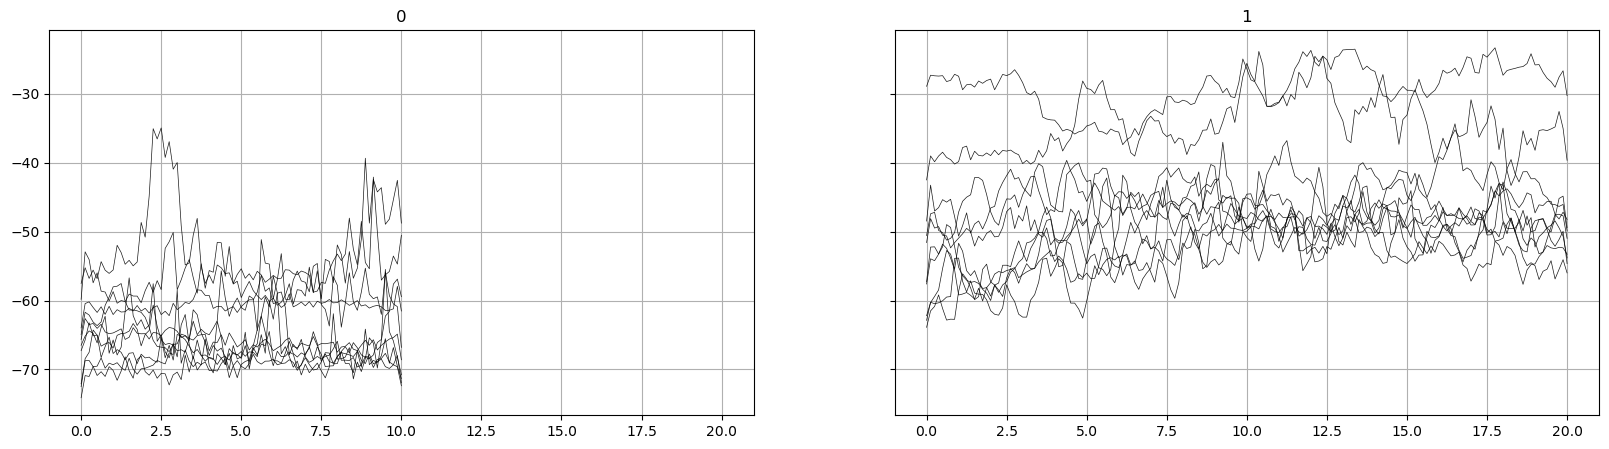

In [70]:
from matplotlib import pyplot as plt

def plot_soundlevels(ax, samples):

    for idx, s in samples.iterrows():
        sl = s['soundlevels'].reset_index()
        ax.plot(sl['time'], sl['dbz'], label=idx, color='black', alpha=0.90, lw=0.5)


selected = with_sl.groupby('class').sample(n=10)
groups = list(selected.groupby('class'))

# TODO: use plotly instead. Allow to click on sample to get filename -> play it back
fig, axs = plt.subplots(ncols=len(groups), figsize=(20, 5), sharex=True, sharey=True)
for ax, (group, rows) in zip(axs, groups):
    
    plot_soundlevels(ax, rows)
    ax.set_title(group)
    ax.grid(True)
